<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第二次作业·支持向量机（SVM）

#### 纪泽西 17375338

#### Last Modified:14th,March,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/SVM.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

from sklearn import svm

path="/content/drive/My Drive/Pattern Recognition/Dataset"
os.chdir(path)
os.listdir(path)

TensorFlow 2.x selected.


['test_labels.mat', 'train_labels.mat', 'train_images.mat', 'test_images.mat']

## Part2:数据预处理

In [0]:
train_images=sio.loadmat("train_images.mat")
test_images=sio.loadmat("test_images.mat")
train_labels=sio.loadmat("train_labels.mat")
test_labels=sio.loadmat("test_labels.mat")

def trans(a):
  a1=a.swapaxes(0,2)
  a2=a1.swapaxes(1,2)
  return a2

train_dataset_np=np.array(train_images.pop('train_images'))
train_dataset_np=trans(train_dataset_np)
train_labels_np=np.array(train_labels.pop('train_labels1'))
train_labels_np=train_labels_np.reshape(60000)
test_dataset_np=np.array(test_images.pop('test_images'))
test_dataset_np=trans(test_dataset_np)
test_labels_np=np.array(test_labels.pop('test_labels1'))
test_labels_np=test_labels_np.reshape(10000)

### 显示预处理后数据集格式及例举数据

(60000, 28, 28) 47040000 3
(60000,) 60000 1
(10000, 28, 28) 7840000 3
(10000,) 10000 1


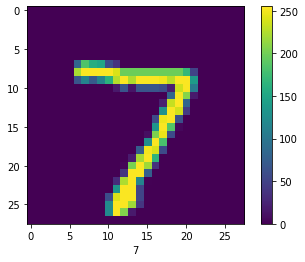

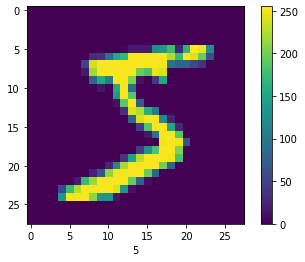

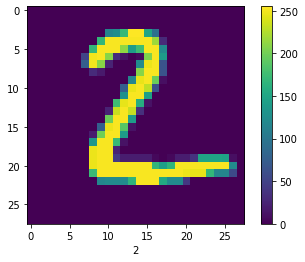

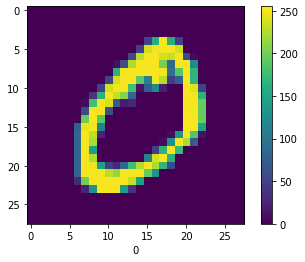

In [3]:
print(train_dataset_np.shape,train_dataset_np.size,train_dataset_np.ndim)
print(train_labels_np.shape,train_labels_np.size,train_labels_np.ndim)
print(test_dataset_np.shape,test_dataset_np.size,test_dataset_np.ndim)
print(test_labels_np.shape,test_labels_np.size,test_labels_np.ndim)

for i in range(0,2):
  plt.imshow(test_dataset_np[i,:,:])
  plt.xlabel(test_labels_np[i])
  plt.colorbar()
  plt.show()
  plt.imshow(train_dataset_np[i,:,:])
  plt.xlabel(train_labels_np[i])
  plt.colorbar()
  plt.show()



### 将数据限幅至[-1,1]

In [4]:
train_dataset_svm=train_dataset_np.reshape([60000,784])
test_dataset_svm=test_dataset_np.reshape([10000,784])

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(train_dataset_svm)
train_dataset_svm = scaling.transform(train_dataset_svm)
test_dataset_svm = scaling.transform(test_dataset_svm)

print(train_dataset_svm.shape,train_dataset_svm.size,train_dataset_svm.ndim)
print(test_dataset_svm.shape,test_dataset_svm.size,test_dataset_svm.ndim)


(60000, 784) 47040000 2
(10000, 784) 7840000 2


### 再次看一看结果

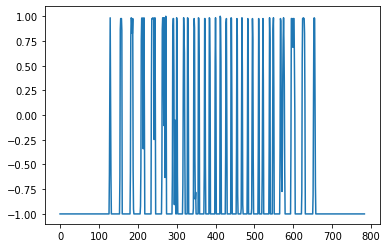

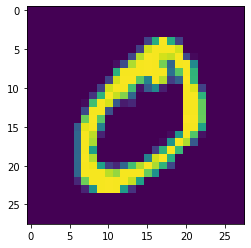

In [5]:
plt.plot(train_dataset_svm[1,:])
plt.show()
plt.imshow(train_dataset_svm[1,:].reshape([28,28]))
plt.show()

## Part3:模型建立


### 使用SKlearn快速建立模型

In [7]:
clf = svm.SVC(max_iter=1500)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 由于样本中元素相对较多，使用SVM方法计算量大，故将最大迭代次数限制到1500，以限制运行时间

### 模型训练

In [8]:
from time import *
begin_time=time()
cv_performance = sklearn.model_selection.cross_val_score(clf, train_dataset_svm,train_labels_np, cv=5)
test_performance = clf.fit(train_dataset_svm,train_labels_np).score(test_dataset_svm,test_labels_np)
print ('Cross-validation accuracy score: %0.3f, test accuracy score: %0.3f' % (np.mean(cv_performance),test_performance))

end_time=time()
final=end_time-begin_time
print('Time Usage:',final)

Cross-validation accuracy score: 0.977, test accuracy score: 0.979
Time Usage: 3502.80228972435


Cross-validation accuracy score: 0.977, 

test accuracy score: 0.979

Time Usage: 3502.80228972435（58min）
#### 可见由于元素过多，svm优化速度较慢。

## Part4：建立预测模型

In [0]:
y_pred = clf.predict(test_dataset_svm)


### 显示对第一个样本的预测

In [22]:
print(y_pred[0],test_labels_np[0])

7 7


### 定义函数形象化预测

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format( predicted_label,                 
                      true_label),
                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 展现预测情况

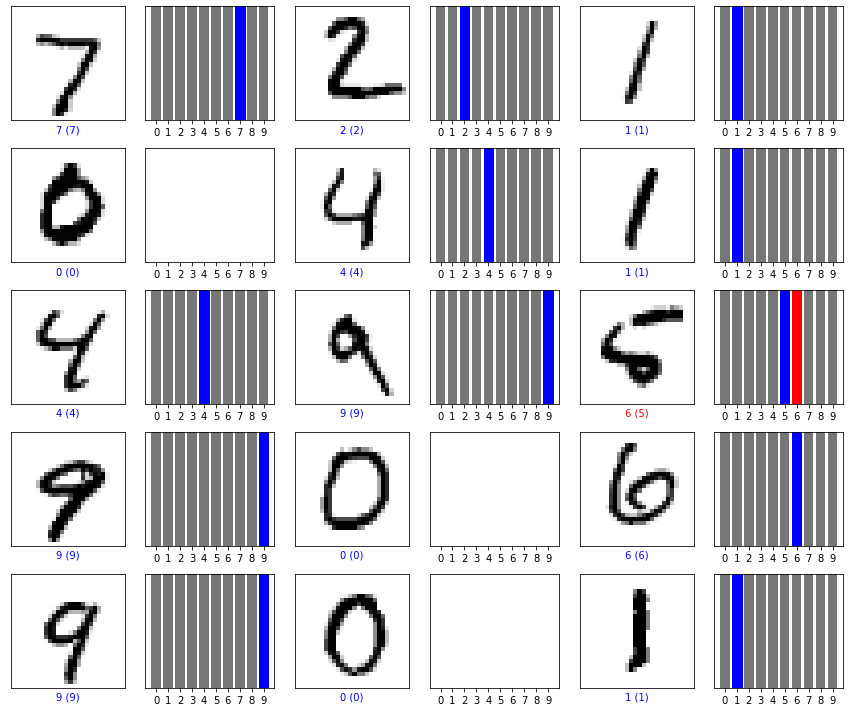

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], test_labels_np, test_dataset_np)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], test_labels_np)
plt.tight_layout()
plt.show()